In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

#Mount drive

Mounted at /content/gdrive


In [ ]:
!git clone 'https://github.com/shadabsk/Sign-Language-Recognition-Using-Hand-Gestures-Keras-PyQT5-OpenCV'
#Clone Data

Cloning into 'Sign-Language-Recognition-Using-Hand-Gestures-Keras-PyQT5-OpenCV'...
remote: Enumerating objects: 52679, done.
remote: Counting objects: 100% (52088/52088), done.
remote: Compressing objects: 100% (52080/52080), done.
remote: Total 52679 (delta 9), reused 52080 (delta 8), pack-reused 591
Receiving objects: 100% (52679/52679), 86.34 MiB | 38.44 MiB/s, done.
Resolving deltas: 100% (184/184), done.
Checking out files: 100% (52086/52086), done.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

import tensorflow as tf

import cv2
import os

import numpy as np


In [ ]:
DATADIRTRAIN="/content/Sign-Language-Recognition-Using-Hand-Gestures-Keras-PyQT5-OpenCV/Source Code/Dataset/training_set"
DATADIRVALID='/content/Sign-Language-Recognition-Using-Hand-Gestures-Keras-PyQT5-OpenCV/Source Code/Dataset/test_set'
#Dataset path

In [ ]:
train=ImageDataGenerator(rescale=1/255,shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
valid=ImageDataGenerator(rescale=1/255)

#ImageDataGenerator is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.
#Rescale 1./255 is to transform every pixel value from range [0,255] -> [0,1].
#Rescale->Data normalization is an important step which ensures that each input parameter (pixel, in this case) has a similar data distribution. 
#Rescale->This makes convergence faster while training the network
#shear_range is for randomly applying shearing transformations. 
#zoom_range is for randomly zooming inside pictures.
# horizontal_flip is for randomly flipping half of the images horizontally

In [ ]:
train= train.flow_from_directory(
       DATADIRTRAIN ,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

valid = valid.flow_from_directory(
        DATADIRVALID,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')
#batch_size: No. of images to be yielded from the generator per batch.

Found 45500 images belonging to 26 classes.
Found 6500 images belonging to 26 classes.


In [ ]:
train.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='sigmoid'))

model.add(Dense(26, activation='softmax'))

model.summary()
#Convolution layer − It is the primary building block and perform computational tasks based on convolution function.
#Pooling layer − It is arranged next to convolution layer and is used to reduce the size of inputs by removing unnecessary information so computation can be performed faster.
#Fully connected layer − It is arranged to next to series of convolution and pooling layer and classify input into various categories.

'''
The dilation_rate parameter of the Conv2D class is a 2-tuple of integers, which controls the dilation rate for dilated convolution.
The Dilated Convolution is the basic convolution applied to the input volume with defined gaps.
We use this parameter when working with higher resolution images and fine-grained details are important
'''

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        3

'\nThe dilation_rate parameter of the Conv2D class is a 2-tuple of integers, which controls the dilation rate for dilated convolution.\nThe Dilated Convolution is the basic convolution applied to the input volume with defined gaps.\nWe use this parameter when working with higher resolution images and fine-grained details are important\n'

In [ ]:
from keras import optimizers
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=7)
#Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving

In [ ]:
model.fit(train,epochs=40,batch_size=32, validation_data = valid,callbacks=[early_stop])
#One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE

Epoch 1/40
1422/1422 [==============================] - 100s 41ms/step - loss: 2.1857 - accuracy: 0.3728 - val_loss: 0.4528 - val_accuracy: 0.9118
Epoch 2/40
1422/1422 [==============================] - 57s 40ms/step - loss: 0.3996 - accuracy: 0.8980 - val_loss: 0.2240 - val_accuracy: 0.9500
Epoch 3/40
1422/1422 [==============================] - 57s 40ms/step - loss: 0.1845 - accuracy: 0.9543 - val_loss: 0.1445 - val_accuracy: 0.9705
Epoch 4/40
1422/1422 [==============================] - 57s 40ms/step - loss: 0.1046 - accuracy: 0.9757 - val_loss: 0.0994 - val_accuracy: 0.9829
Epoch 5/40
1422/1422 [==============================] - 57s 40ms/step - loss: 0.0751 - accuracy: 0.9825 - val_loss: 0.0934 - val_accuracy: 0.9838
Epoch 6/40
1422/1422 [==============================] - 57s 40ms/step - loss: 0.0531 - accuracy: 0.9866 - val_loss: 0.1142 - val_accuracy: 0.9806
Epoch 7/40
1422/1422 [==============================] - 57s 40ms/step - loss: 0.0476 - accuracy: 0.9875 - val_loss: 0.0884 

In [ ]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,1.349307,0.622242,0.452838,0.911846
1,0.325751,0.918132,0.223950,0.950000
2,0.161204,0.960022,0.144522,0.970462
3,0.098467,0.976198,0.099432,0.982923
4,0.067629,0.983824,0.093428,0.983846
5,0.049165,0.987956,0.114188,0.980615
6,0.043414,0.988681,0.088411,0.987692
7,0.033520,0.991538,0.081028,0.988462
8,0.028647,0.992615,0.092876,0.982308
9,0.023569,0.994220,0.089542,0.985692


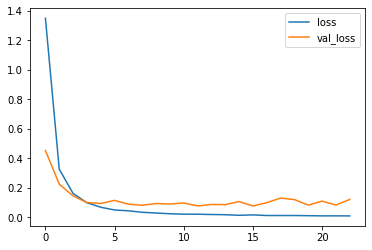

In [ ]:
metrics[['loss','val_loss']].plot()
plt.show()

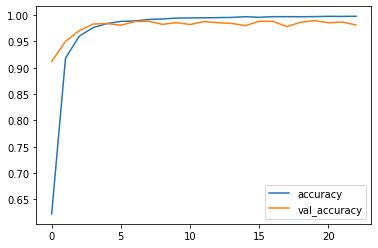

In [ ]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()